In [6]:
%reset -f

import torch
import torchvision
import shutil 
import numpy as np
import matplotlib.pyplot as plt

batch_size= 32

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('../datasets/mnist', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                                torchvision.transforms.Resize([32, 32]),
                                torchvision.transforms.ToTensor(),
                                #torchvision.transforms.Normalize(
                                # (0.5,), (0.5,))
                             ])),
  batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../datasets/mnist', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                                torchvision.transforms.Resize([32, 32]),
                                torchvision.transforms.ToTensor(),
                                #torchvision.transforms.Normalize(
                                # (0.5,), (0.5,))
                             ])),
  batch_size=16, shuffle=False, drop_last= True)

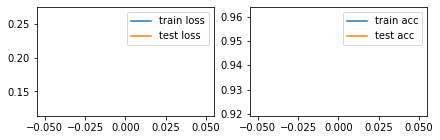

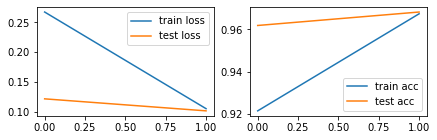

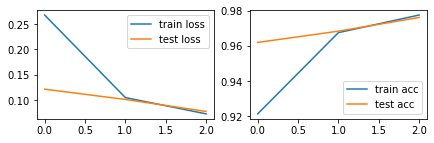

Finished Training


In [51]:
from modules.models.classifiers import simple_mnist_classifier
from modules.models.classifiers import classification_accuracy as accuracy

device = 'cuda'
net= simple_mnist_classifier(32).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

loss_train, loss_test = [], []
acc_train, acc_test = [], []

for epoch in range(3):  # loop over the dataset multiple times
    running_loss = []
    running_acc=[]
    net.train()
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss.append(loss.item())
        running_acc.append(accuracy(labels, outputs))
    loss_train.append(np.mean(running_loss))
    acc_train.append(np.mean(running_acc))
    
    running_loss = []
    running_acc=[]
    net.eval()
    for i, (inputs, labels) in enumerate(test_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        with torch.no_grad():
            outputs = net(inputs)
            loss = criterion(outputs, labels)

        running_loss.append(loss.item())
        running_acc.append(accuracy(labels, outputs))
    loss_test.append(np.mean(running_loss))
    acc_test.append(np.mean(running_acc))
    
    plt.figure(figsize= (7, 2))
    plt.subplot(1,2,1)
    plt.plot(loss_train, label='train loss')
    plt.plot(loss_test, label= 'test loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(acc_train, label='train acc')
    plt.plot(acc_test, label= 'test acc')
    plt.legend()
    plt.show()


print('Finished Training')

In [52]:
torch.save({'model_state_dict': net.state_dict(),}, 'mnist_classifier.pth')